In [6]:
import cv2 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
images = []
labels = []
for i in range(1000):
    img = cv2.imread("liveness_detection/img-live/" + str(i)+".jpg", 0)
    img = cv2.resize(img, (100,100))
    images.append(img)
    labels.append(0)

for i in range(1000):
    img = cv2.imread("liveness_detection/img-not-live/" + str(i)+".jpg", 0)
    img = cv2.resize(img, (100,100))
    images.append(img)
    labels.append(1)



In [9]:
X = np.array(images, dtype=float)

y = np.array(labels, dtype=float)

In [10]:
print(X.shape,X.dtype, y.shape,  y.dtype)

(2000, 100, 100) float64 (2000,) float64


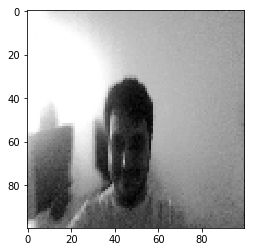

In [11]:
plt.imshow(X[950], cmap='gray')
plt.show()

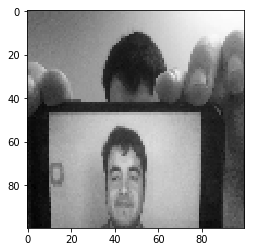

In [12]:
plt.imshow(X[1200], cmap='gray')
plt.show()

In [13]:
X /=255

In [14]:
y= y.reshape((-1,1))

In [15]:
X = X.reshape((-1,100,100,1))

In [16]:
from sklearn.preprocessing import OneHotEncoder
Oneencoder = OneHotEncoder()
y = Oneencoder.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,y.toarray(), test_size=.05, random_state=32)

In [18]:

import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d, avg_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression


In [19]:

# Building convolutional network
network = input_data(shape=[None, 100, 100, 1], name='input')
network = conv_2d(network, 32, 5, activation='relu')
network = avg_pool_2d(network, 2)
network = conv_2d(network, 64, 5, activation='relu')
network = avg_pool_2d(network, 2)
network = fully_connected(network, 128, activation='relu')
network = fully_connected(network, 64, activation='relu')
network = fully_connected(network, 2, activation='softmax')
network = regression(network, optimizer='adam', learning_rate=0.001,
                     loss='categorical_crossentropy', name='target')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In [20]:

# Training
model = tflearn.DNN(network, tensorboard_verbose=0)

In [21]:

model.fit({'input': x_train}, {'target': y_train}, n_epoch=30,validation_set=({'input': x_val}, {'target': y_val}), snapshot_step=100, show_metric=True, run_id='liveness_3')



Training Step: 899  | total loss: 0.19517 | time: 55.572s
| Adam | epoch: 030 | loss: 0.19517 - acc: 0.9781 -- iter: 1856/1900
Training Step: 900  | total loss: 0.17576 | time: 58.519s
| Adam | epoch: 030 | loss: 0.17576 - acc: 0.9803 | val_loss: 0.00397 - val_acc: 1.0000 -- iter: 1900/1900
--


In [22]:
model.save('model/my_model.tflearn')

INFO:tensorflow:/Users/ahmethamzaemra/Documents/github/Intelegent_Lock/model/my_model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [23]:
model.load('model/my_model.tflearn')

INFO:tensorflow:Restoring parameters from /Users/ahmethamzaemra/Documents/github/Intelegent_Lock/model/my_model.tflearn


In [24]:
model.predict(x_val)[99]

array([ 0.9983353 ,  0.00166476], dtype=float32)

In [25]:
y_val[99]

array([ 1.,  0.])

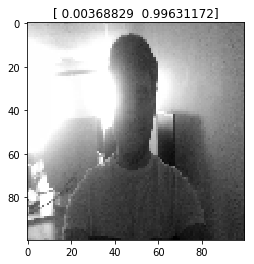

In [26]:
plt.imshow(x_val.reshape((-1,100,100))[99], cmap='gray')
plt.title(model.predict(x_val)[0])
plt.show()

In [29]:
import face_recognition

In [38]:

hamza_image = face_recognition.load_image_file("hamza.jpg")
hamza_face_locations = face_recognition.face_locations(hamza_image)
hamza_face_encoding = face_recognition.face_encodings(hamza_image,hamza_face_locations)[0]


In [41]:
bedir_image = face_recognition.load_image_file("bedir.jpg")
bedir_face_locations = face_recognition.face_locations(bedir_image)
bedir_face_encoding = face_recognition.face_encodings(bedir_image,bedir_face_locations)[0]



In [44]:
bedir_face_encoding

array([-0.09802376,  0.13595934,  0.09296237,  0.00323132, -0.0558693 ,
        0.01897275, -0.05747965, -0.04724901,  0.12283539, -0.14014785,
        0.23625061,  0.00164083, -0.15224266, -0.06327471, -0.06114132,
        0.13817166, -0.0995623 , -0.17522159, -0.09099942, -0.13754964,
       -0.07081355,  0.06410912, -0.04437348,  0.04624769, -0.11664091,
       -0.27656209, -0.08149313, -0.04867665,  0.0872443 , -0.0967467 ,
       -0.00185273,  0.04602033, -0.15147687, -0.0261299 ,  0.08829261,
        0.08079882, -0.00786183, -0.01577805,  0.18307689, -0.05201546,
       -0.11680447,  0.1302138 ,  0.09021482,  0.3520807 ,  0.15389541,
        0.01956568, -0.02632274, -0.04850395,  0.10526173, -0.18214814,
        0.10449607,  0.19599213,  0.09385563,  0.09713139,  0.07024668,
       -0.09889852,  0.01047165,  0.14238581, -0.09642509,  0.06959309,
        0.03469996, -0.00863556,  0.01311437,  0.00419643,  0.13527022,
        0.07882039, -0.07966132, -0.19757661,  0.13958174, -0.18

In [45]:
face_recognition.compare_faces([bedir_face_encoding], hamza_face_encoding)

[False]

In [48]:
face_recognition.face_distance([bedir_face_encoding], hamza_face_encoding)

array([ 0.732154])

In [ ]:
face_recognition.([bedir_face_encoding], hamza_face_encoding)

In [ ]:


# Load a sample picture and learn how to recognize it.


hamza_image2 = face_recognition.load_image_file('hamza2.jpg')
hamza_face_encoding2 = face_recognition.face_encodings(hamza_image2)[0]
names = ['HAMZA', 'BEDIR', 'HAMZA']
encods = [hamza_face_encoding, bidem_face_encoding,hamza_face_encoding2]


# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()
    
    
    imglive = cv2.resize(frame, (100,100))
    imglive = np.array([imglive/255])
    imglive = imglive.reshape(-1,100,100,1)
    
    probs = model.predict(imglive)
    
    
    
    if probs[0][0]>= .90:
        
    


        # Resize frame of video to 1/4 size for faster face recognition processing
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

        # Only process every other frame of video to save time
        if process_this_frame:
            # Find all the faces and face encodings in the current frame of video
            face_locations = face_recognition.face_locations(small_frame)
            face_enqodings = face_recognition.face_encodings(small_frame, face_locations)
            name= " "
            face_names = []
            for face_encoding in face_encodings:
                for i in range(len(encods)):
                    match = face_recognition.compare_faces([encods[i]], face_encoding)
                    if name == " ":
                        name = "U ugly!"


                    if match[0]:
                        name = names[i]

                face_names.append(name)

        process_this_frame = not process_this_frame


        # Display the results
        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Scale back up face locations since the frame we detected in was scaled to 1/4 size
            top *= 4
            right *= 4
            bottom *= 4
            left *= 4

            # Draw a box around the face
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

            # Draw a label with a name below the face
            cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()



